In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot

# KSD standard kernel

In [ ]:
np.random.seed(2024)

In [ ]:
# simulate sampling distribution for stat
stats_ls_all_eps = []
eps_ls = [0.001, 0.005, 0.01, 0.05, 0.1]
nreps = 1000

for eps in eps_ls:
    stat_ls = []
    
    ###
    mean1 = np.zeros((dim,)) # data
    mean2 = np.zeros((dim,)) # model
    
    Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
    n_outlier = max(1, int(n * eps))
    Xs[:, :n_outlier] = outlier

    score_fn = lambda x: - (x - mean2)
    ###
    
    kernel = kernels.RBF(sigma_sq=2.)
    ksd = metrics.KSD(kernel, score_fn=score_fn)
    for X in tqdm(Xs):
        stat_ls.append(ksd(X, X, vstat=True))

    stats_ls_all_eps.append(stat_ls)

# KSD tilted kernel

In [138]:
def stats_against_outliers(outliers_ls, kernel_name, nreps, eps=0.01, dim=1, n=1000):
    stats_ls_all_ol = []
    
    for outlier in outliers_ls:
        stat_ls = []
        
        ###
        mean1 = np.zeros((dim,)) # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
        n_outlier = max(1, int(n * eps))
        Xs[:, :n_outlier] = outlier
    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X))
    
        stats_ls_all_ol.append(stat_ls)

    return stats_ls_all_ol

In [18]:
np.random.seed(2024)

In [19]:
# # simulate sampling distribution for stat
# # res_ol = {"RBF": [], "tilted": []}
# stats_ls_all_ol = []
# outliers_ls = [0.001, 0.01, 0.1, 1., 10., 100.]
# nreps = 10

# for outlier in outliers_ls:
#     stat_ls = []
    
#     ###
#     mean1 = np.zeros((dim,)) # data
#     mean2 = np.zeros((dim,)) # model
    
#     eps = 0.01
#     Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))
#     n_outlier = max(1, int(n * eps))
#     Xs[:, :n_outlier] = outlier

#     score_fn = lambda x: - (x - mean2)
#     ###
    
#     score_weight_fn = kernels.ScoreWeightFunction(score_fn)
#     kernel0 = kernels.RBF(sigma_sq=2.)
#     kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
    
#     ksd = metrics.KSD(kernel, score_fn=score_fn)
#     for X in tqdm(Xs):
#         stat_ls.append(ksd(X, X))

#     stats_ls_all_ol.append(stat_ls)

In [136]:
outliers_ls = [0.001, 0.01, 0.1, 1., 10., 100.]

In [139]:
stats_ls_all_ol_tilted_null = stats_against_outliers([0.], "tilted", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [142]:
stats_ls_all_ol_tilted = stats_against_outliers(outliers_ls, "tilted", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [50]:
stats_ls_all_ol_rbf_null = stats_against_outliers([0.], "rbf", eps=0., nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [32]:
stats_ls_all_ol_rbf = stats_against_outliers(outliers_ls, "rbf", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [150]:
res_ol = {"tilted": stats_ls_all_ol_tilted, "rbf": stats_ls_all_ol_rbf, 
          "tilted_null": stats_ls_all_ol_tilted_null, "rbf_null": stats_ls_all_ol_rbf_null}

In [52]:
# import pickle
# pickle.dump(res_ol, open("../res/ustats_outlier.pkl", "wb"))

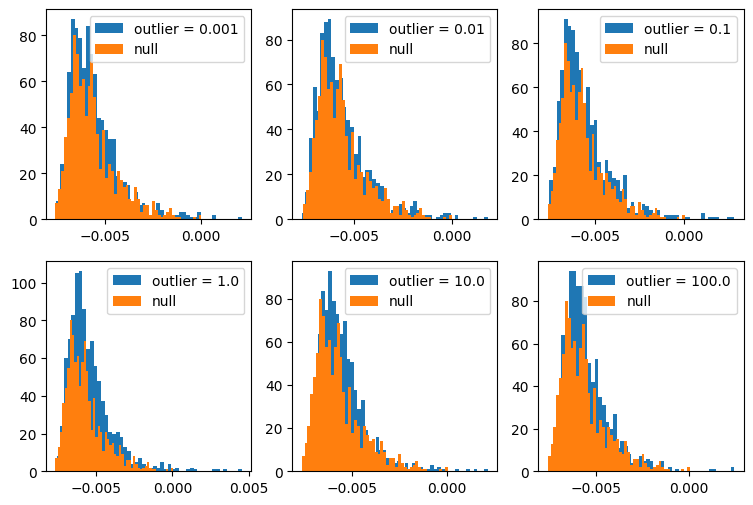

In [153]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(outliers_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ol["tilted"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ol["tilted_null"][0], bins=50, label=f"null")
    # ax.set_xlim(0., 0.11)
    ax.legend()

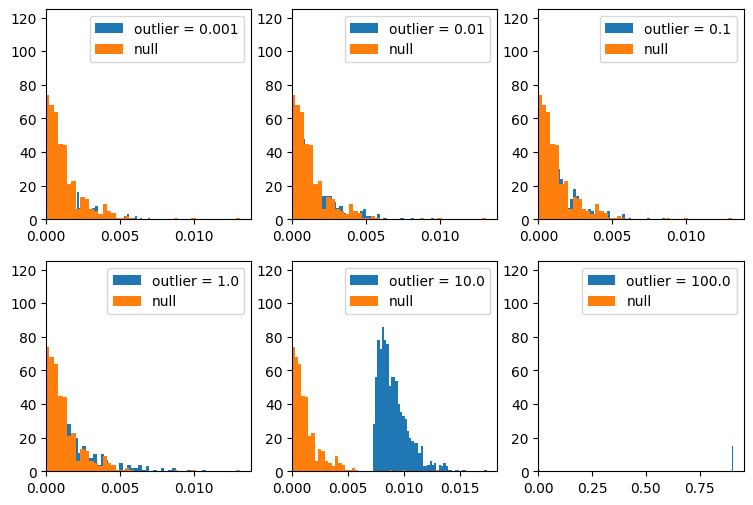

In [147]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(outliers_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ol["rbf"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ol["rbf_null"][0], bins=50, label=f"null")
    ax.set_xlim(0.)
    ax.legend()

Check power

In [164]:
def stats_mean_shift(mean_ls, kernel_name, nreps, dim=1, n=1000):
    stats_ls_all_ol = []
    
    for mean in mean_ls:
        stat_ls = []
        
        ###
        mean1 = np.eye(dim)[0] * mean # data
        mean2 = np.zeros((dim,)) # model
        
        Xs = np.random.multivariate_normal(mean1, np.eye(dim), (nreps, n))    
        score_fn = lambda x: - (x - mean2)
        ###

        if kernel_name == "tilted":
            score_weight_fn = kernels.PolyWeightFunction()
            kernel0 = kernels.RBF(sigma_sq=2.)
            kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)
        elif kernel_name == "rbf":
            kernel = kernels.RBF(sigma_sq=2.)
        
        ksd = metrics.KSD(kernel, score_fn=score_fn)
        for X in tqdm(Xs):
            stat_ls.append(ksd(X, X))
    
        stats_ls_all_ol.append(stat_ls)

    return stats_ls_all_ol

In [183]:
np.random.seed(2024)

In [184]:
mean_ls = [1e-2, 1e-1, 1., 10., 100., 1000.]

In [ ]:
stats_ls_all_ms_tilted = stats_mean_shift(mean_ls, "tilted", nreps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
plt.plot(mean_ls, [np.mean(rr) for rr in stats_ls_all_ms_tilted])
plt.xscale("log")

In [ ]:
res_ms = {"tilted": stats_ls_all_ms_tilted,  
          "tilted_null": stats_ls_all_ol_tilted_null}

In [ ]:
pickle.dump(res_ms, open("../res/ustats_ms.pkl", "wb"))

In [ ]:
# true sampling distribution
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))

for i, ww in enumerate(mean_ls):
    ax = axes.flatten()[i]
    ax.hist(res_ms["tilted"][i], bins=50, label=f"outlier = {ww}")
    ax.hist(res_ms["tilted_null"][0], bins=50, label=f"null")
    ax.legend()